In [2]:
import pickle, os
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# gets all the file paths ending in .pickle from a directory
def get_files_from_paths(paths):
    files = []
    for path in paths :
        if os.path.isfile(path):
            files.append(path)
        else :
            for file in os.listdir(path):
                if file.endswith('.pickle'):
                    files.append(path + '/' + file)
    return files

In [62]:
swimmer_v1_paths = [
    "../outputs/Swimmer-v2/v1/1904016/save/",
    "../outputs/Swimmer-v2/v1/1954056/save/",
    "../outputs/Swimmer-v2/v1/19527252/save/" 
]
swimmer_v2_paths = [
    "../outputs/Swimmer-v2/v2/1904016/save/",
    "../outputs/Swimmer-v2/v2/1954056/save/",
    "../outputs/Swimmer-v2/v2/19527252/save/" 
]
swimmer_100seeds_paths = [
    "../outputs/Swimmer-v2/v1/rs/save/"
]

swimmer_v1_files = get_files_from_paths(swimmer_v1_paths)
swimmer_v2_files = get_files_from_paths(swimmer_v2_paths)
swimmer_100seeds_files = get_files_from_paths(swimmer_100seeds_paths)

In [65]:
def read_file(path):
    with open(path, "rb") as f:
        return pickle.load(f)

# reads a list of pickle file paths and returns the rewards
def read_files(paths):
    all_rewards = None
    for path in paths :
        rewards = read_file(path).rewards
        rewards = np.array(rewards).reshape(1,-1)
        if all_rewards is None:
            all_rewards = rewards
        else :
            all_rewards = np.vstack((all_rewards, rewards))
    return all_rewards

swimmer_v1_rewards = read_files(swimmer_v1_files)
swimmer_v2_rewards = read_files(swimmer_v2_files)
swimmer_100seeds_rewards = read_files(swimmer_100seeds_files)

In [66]:
def plot_many(experiments, label=None, color=None):
    mean_exp = np.mean(experiments, axis=0)
    std_exp = np.std(experiments, axis=0)
    plt.plot(mean_exp, color=color, label=label)
    plt.fill_between(range(len(experiments[0])), mean_exp + std_exp,
    mean_exp - std_exp, color=color, alpha=0.1)

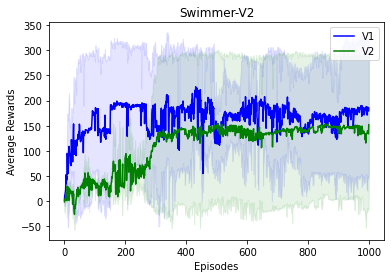

In [69]:
plot_many(swimmer_v1_rewards, label="V1", color = "Blue")
plot_many(swimmer_v2_rewards, label="V2", color = "Green")
plt.title("Swimmer-V2")
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
plt.legend()

Text(0, 0.5, 'Average Rewards')

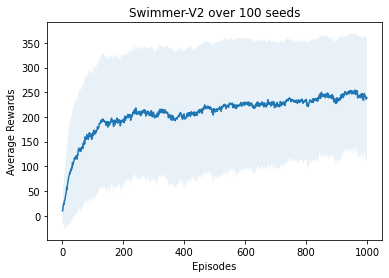

In [71]:
plot_many(swimmer_100seeds_rewards)
plt.title("Swimmer-V2 over 100 seeds")
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")